In [1]:
%matplotlib inline
import os

import numpy as np
from matplotlib import pyplot as plt
from mintpy.utils import utils as ut

plt.rcParams.update({"font.size": 12})

## Simulate ENU displacement

In [2]:
simV, simH = 1, 0.5
azimuth = 30  # [0 for north, -90 for east] defined as azimuth angle in degrees measured from the north with anti-clockwise as positive


- `simV` and `simH` define the vertical and horizontal displacement magnitudes (1 and 0.5, respectively).
- `azimuth` specifies the direction of the displacement. It’s measured in degrees counterclockwise from north. In this case, the azimuth is 30° from the north.

In [3]:
# ENU setup
length, width = 100, 100
dE = np.zeros((length, width), dtype=np.float32)
dN = np.zeros((length, width), dtype=np.float32)
dU = np.zeros((length, width), dtype=np.float32)

- A 2D grid of size $100×100$ is created for each component of the ENU system:
    - dE for displacement in the East direction.
    - dN for displacement in the North direction.
    - dU for displacement in the Up direction.
- Initially, all grids are filled with zeros (no displacement).

In [4]:
dE[30:70, 20:50] = -simH * np.sin(azimuth * np.pi / 180) * -1
dE[30:70, 50:80] = simH * np.sin(azimuth * np.pi / 180) * -1
dN[30:70, 20:50] = -simH * np.cos(azimuth * np.pi / 180)
dN[30:70, 50:80] = simH * np.cos(azimuth * np.pi / 180)
dU[30:70, 20:50] = -simV
dU[30:70, 50:80] = simV

- Displacement values are assigned to two rectangular regions within the grid:
    - Rows 30 to 70 (inclusive) and columns 20 to 50, and another block at 50 to 80.
- Each region’s displacement is calculated based on the azimuth:
    - East (dE): Uses the sine of the azimuth.
    - North (dN): Uses the cosine of the azimuth.
    - Up (dU): Directly set to -simV or simV to represent upward/downward motion.
- The * -1 is included to reverse the direction when necessary.

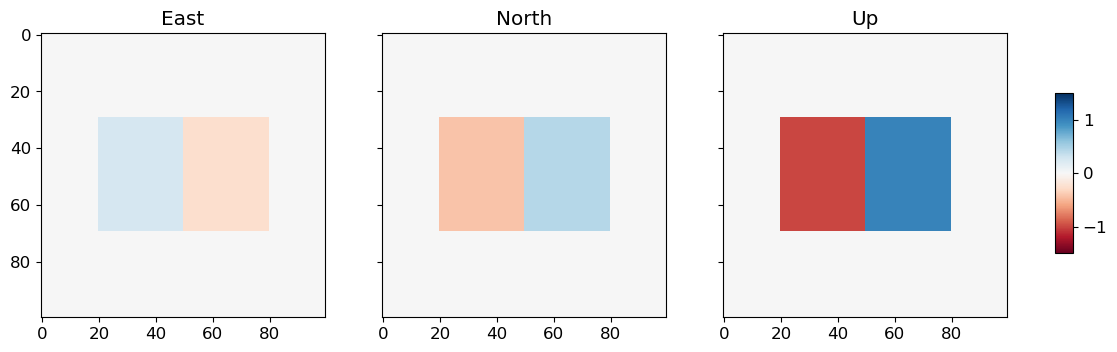

In [5]:
# plot - ENU
kwargs = dict(vmin=-1.5, vmax=1.5, cmap="RdBu", interpolation="nearest")
cbar_len = 0.4
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[12, 4], sharey=True)
for ax, data, title in zip(axs, [dE, dN, dU], ["East", "North", "Up"]):
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)
fig.subplots_adjust(right=0.93)
cax = fig.add_axes([0.97, (1.0 - cbar_len) / 2, 0.015, cbar_len])
fig.colorbar(im, cax=cax)
plt.show()

- Visualization setup:
    - Displacements in the East, North, and Up directions are displayed as heatmaps.
    - Each subplot corresponds to one ENU component, showing the spatial variation of displacement.
    - The color map ("RdBu") helps differentiate positive (red) and negative (blue) displacement values.
    - A shared color scale (from -1.5 to 1.5) makes it easier to compare displacements across the three components.
- Output:
    - A figure with three panels, each representing the displacement in one ENU direction.

### 1. Displacement Components

#### East ($dE$)
For a given azimuth angle ($\theta$):
$$
dE = -H \cdot \sin\left(\frac{\theta \cdot \pi}{180}\right) \cdot (-1)
$$

#### North ($dN$)
$$
dN = -H \cdot \cos\left(\frac{\theta \cdot \pi}{180}\right)
$$

#### Up ($dU$)
$$
dU = 
\begin{cases} 
-V, & \text{for the first region} \\
V, & \text{for the second region}
\end{cases}
$$

### 2. Grid Assignment

For region $ \text{R1} = \{(i, j) \mid 30 \leq i < 70, 20 \leq j < 50\} $:
$$
dE[i, j] = -H \cdot \sin\left(\frac{\theta \cdot \pi}{180}\right) \cdot (-1)
$$
$$
dN[i, j] = -H \cdot \cos\left(\frac{\theta \cdot \pi}{180}\right)
$$
$$
dU[i, j] = -V
$$

For region $ \text{R2} = \{(i, j) \mid 30 \leq i < 70, 50 \leq j < 80\} $:
$$
dE[i, j] = H \cdot \sin\left(\frac{\theta \cdot \pi}{180}\right) \cdot (-1)
$$
$$
dN[i, j] = H \cdot \cos\left(\frac{\theta \cdot \pi}{180}\right)
$$
$$
dU[i, j] = V
$$

### 3. Parameters
- $ H $: Horizontal displacement magnitude (simH in the code, $ H = 0.5 $).
- $ V $: Vertical displacement magnitude (simV in the code, $ V = 1 $).
- $ \theta $: Azimuth angle in degrees ($ \theta = 30^\circ $).


## ENU -> asc/desc LOS

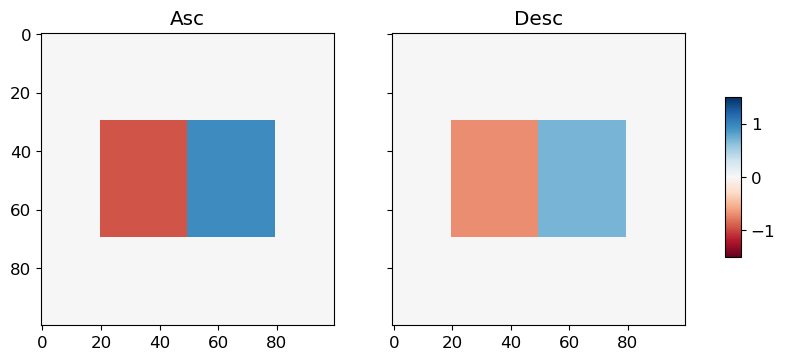

In [6]:
# ENU to LOS
inc_angle = 30
az_angle_asc = 102
az_angle_desc = -102
dAsc = ut.enu2los(dE, dN, dU, inc_angle=inc_angle, az_angle=az_angle_asc)
dDesc = ut.enu2los(dE, dN, dU, inc_angle=inc_angle, az_angle=az_angle_desc)

# plot - asc/desc LOS
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4], sharey=True)
for ax, data, title in zip(axs, [dAsc, dDesc], ["Asc", "Desc"]):
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)
fig.subplots_adjust(right=0.93)
cax = fig.add_axes([0.98, (1.0 - cbar_len) / 2, 0.02, cbar_len])
fig.colorbar(im, cax=cax)
plt.show()

This code converts displacement in the **East-North-Up (ENU)** coordinate system into **Line-of-Sight (LOS)** displacement for ascending and descending satellite tracks, using the following formula:

$$
v_\text{los} = -v_e \cdot \sin(\text{inc\_angle}) \cdot \sin(\text{az\_angle}) 
+ v_n \cdot \sin(\text{inc\_angle}) \cdot \cos(\text{az\_angle}) 
+ v_u \cdot \cos(\text{inc\_angle})
$$

### Explanation:
1. **Input Parameters**:
   - `inc_angle`: Incidence angle ($30^\circ$), the tilt of the LOS from vertical.
   - `az_angle_asc`: Azimuth angle for the ascending track ($102^\circ$).
   - `az_angle_desc`: Azimuth angle for the descending track ($-102^\circ$).

2. **Projection**:
   - The `enu2los` function computes LOS displacement (`dAsc` and `dDesc`) by projecting $dE$, $dN$, and $dU$ onto the LOS vector.

## asc/desc LOS -> horz/vert

In [7]:
# construct design matrix
A = np.zeros((2, 2), dtype=np.float32)
A[0, 0] = np.cos(inc_angle * np.pi / 180)
A[0, 1] = np.sin(inc_angle * np.pi / 180) * np.cos(
    az_angle_asc * np.pi / 180 - azimuth * np.pi / 180
)
A[1, 0] = np.cos(inc_angle * np.pi / 180)
A[1, 1] = np.sin(inc_angle * np.pi / 180) * np.cos(
    az_angle_desc * np.pi / 180 - azimuth * np.pi / 180
)

### What Does $A$ Look Like?
For ascending ($d_\text{Asc}$) and descending ($d_\text{Desc}$) tracks:
$$
A =
\begin{bmatrix}
\cos(\text{inc\_angle}) & \sin(\text{inc\_angle}) \cdot \cos(\text{az\_asc} - \text{azimuth}) \\
\cos(\text{inc\_angle}) & \sin(\text{inc\_angle}) \cdot \cos(\text{az\_desc} - \text{azimuth})
\end{bmatrix}
$$

### Mathematical Relationship

The LOS displacement ($d_\text{LOS}$) depends on how much vertical and horizontal motion contributes to it:

$$
d_\text{LOS} = A 
\begin{bmatrix}
dV \\
dH
\end{bmatrix}
$$

For two LOS observations ($d_\text{Asc}$ and $d_\text{Desc}$), we have:

$$
\begin{bmatrix}
d_\text{Asc} \\
d_\text{Desc}
\end{bmatrix}
=
\begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}
\begin{bmatrix}
dV \\
dH
\end{bmatrix}
$$


Where the elements of $A$ depend on the satellite's incidence and azimuth angles, describing how the LOS "sees" the vertical and horizontal components.

### Purpose of $A$

The design matrix $A$ allows us to solve the system:

$$
\begin{bmatrix}
d_\text{Asc} \\
d_\text{Desc}
\end{bmatrix}
=
A \cdot
\begin{bmatrix}
dV \\
dH
\end{bmatrix}
$$

Using the pseudoinverse of $A$, we can recover $dV$ (vertical displacement) and $dH$ (horizontal displacement):

$$
\begin{bmatrix}
dV \\
dH
\end{bmatrix}
=
A^\dagger \cdot
\begin{bmatrix}
d_\text{Asc} \\
d_\text{Desc}
\end{bmatrix}
$$

The pseudoinverse of a matrix $A$, denoted as $A^\dagger$, is a generalization of the inverse for matrices that may not be square or invertible. For a $2 \times 2$ matrix $A$, the pseudoinverse is computed as follows:

---

### 1. **Matrix $A$**
The matrix $A$ in this context is:

$$
A =
\begin{bmatrix}
\cos(\text{inc\_angle}) & \sin(\text{inc\_angle}) \cdot \cos(\text{az\_asc} - \text{azimuth}) \\
\cos(\text{inc\_angle}) & \sin(\text{inc\_angle}) \cdot \cos(\text{az\_desc} - \text{azimuth})
\end{bmatrix}
$$

---

### 2. **Pseudoinverse Formula**
For a $2 \times 2$ matrix, the pseudoinverse $A^\dagger$ is given by:

$$
A^\dagger = \left( A^T A \right)^{-1} A^T
$$

Where:
- $A^T$: Transpose of $A$.
- $A^T A$: A square symmetric matrix.
- $\left( A^T A \right)^{-1}$: Inverse of $A^T A$, which exists if $A^T A$ is non-singular.

---

### 3. **Explicit Form for $A^\dagger$**

Let:
$$
A =
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

The pseudoinverse $A^\dagger$ can be expressed as:
$$
A^\dagger =
\frac{1}{\det(A^T A)}
\begin{bmatrix}
d^2 + b^2 & -cd - ab \\
-cd - ab & c^2 + a^2
\end{bmatrix}
A^T
$$

Where:
- $A^T$ is the transpose:
  $$
  A^T =
  \begin{bmatrix}
  a & c \\
  b & d
  \end{bmatrix}
  $$
- $\det(A^T A)$ is the determinant of $A^T A$:
  $$
  \det(A^T A) = (a^2 + c^2)(b^2 + d^2) - (ab + cd)^2
  $$

---

### 4. **Numerical Computation**
In practice, the pseudoinverse is computed using numerical libraries (e.g., `numpy.linalg.pinv`), which handle edge cases like singular or ill-conditioned matrices.

For your specific $A$:

```python
import numpy as np

# Example input angles in radians
inc_angle = 30 * np.pi / 180
az_angle_asc = 102 * np.pi / 180
az_angle_desc = -102 * np.pi / 180
azimuth = 0 * np.pi / 180

# Define A
A = np.array([
    [np.cos(inc_angle), np.sin(inc_angle) * np.cos(az_angle_asc - azimuth)],
    [np.cos(inc_angle), np.sin(inc_angle) * np.cos(az_angle_desc - azimuth)]
])

# Compute pseudoinverse of A
A_pinv = np.linalg.pinv(A)
print(A_pinv)
```

---

### **Key Takeaway**
The pseudoinverse of $A$ allows us to invert the relationship between LOS displacements and vertical/horizontal components, even if $A$ is not square or invertible in the traditional sense. The numerical computation ensures robustness in real-world scenarios.

In [8]:
# asc / desc -> horz / vert
dLOS = np.vstack((dAsc.flatten(), dDesc.flatten()))
dVH = np.dot(np.linalg.pinv(A), dLOS).astype(np.float32)
dV = np.reshape(dVH[0, :], (length, width))
dH = np.reshape(dVH[1, :], (length, width))

This code converts **Line-of-Sight (LOS)** displacements from ascending ($d_\text{Asc}$) and descending ($d_\text{Desc}$) tracks into **vertical ($dV$)** and **horizontal ($dH$)** components using the **pseudoinverse of the design matrix** ($A^\dagger$).

---

### **Step-by-Step Explanation with Mathematical Formulas**

1. **Stacking LOS Data**:
   ```python
   dLOS = np.vstack((dAsc.flatten(), dDesc.flatten()))
   ```
   - The LOS data from ascending ($d_\text{Asc}$) and descending ($d_\text{Desc}$) tracks are combined into a single matrix:
     $$
     d_\text{LOS} =
     \begin{bmatrix}
     d_\text{Asc} \\
     d_\text{Desc}
     \end{bmatrix}
     $$
   - Both $d_\text{Asc}$ and $d_\text{Desc}$ are flattened into 1D arrays to align them with matrix operations.

2. **Pseudoinverse Projection**:
   ```python
   dVH = np.dot(np.linalg.pinv(A), dLOS).astype(np.float32)
   ```
   - The pseudoinverse of the design matrix $A$ ($A^\dagger$) is applied to recover the vertical ($dV$) and horizontal ($dH$) displacements:
     $$
     \begin{bmatrix}
     dV \\
     dH
     \end{bmatrix}
     =
     A^\dagger
     \begin{bmatrix}
     d_\text{Asc} \\
     d_\text{Desc}
     \end{bmatrix}
     $$
   - This projection decomposes the LOS measurements into their vertical and horizontal components based on the satellite viewing geometry.

3. **Reshaping into 2D Grids**:
   ```python
   dV = np.reshape(dVH[0, :], (length, width))
   dH = np.reshape(dVH[1, :], (length, width))
   ```
   - The 1D arrays for $dV$ and $dH$ are reshaped into 2D grids to match the original dimensions of the LOS data:
     - $dV$: Vertical displacement grid.
     - $dH$: Horizontal displacement grid.

---

### **Mathematical Summary**
- Input:
  - Ascending LOS displacement: $d_\text{Asc}$.
  - Descending LOS displacement: $d_\text{Desc}$.
  - Design matrix: $A$.
- Process:
  - Compute pseudoinverse $A^\dagger = \left(A^T A\right)^{-1} A^T$.
  - Project LOS displacements to vertical and horizontal components:
    $$
    \begin{bmatrix}
    dV \\
    dH
    \end{bmatrix}
    =
    A^\dagger
    \begin{bmatrix}
    d_\text{Asc} \\
    d_\text{Desc}
    \end{bmatrix}
    $$
- Output:
  - $dV$: 2D vertical displacement grid.
  - $dH$: 2D horizontal displacement grid.

This method decomposes satellite LOS data into geophysically meaningful vertical and horizontal motions using a mathematically robust pseudoinverse projection.

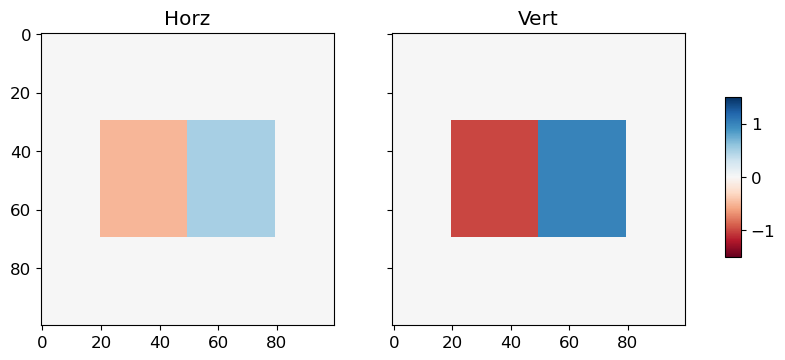

In [9]:
# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4], sharey=True)
for ax, data, title in zip(axs, [dH, dV], ["Horz".format(azimuth), "Vert"]):
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)
fig.subplots_adjust(right=0.93)
cax = fig.add_axes([0.98, (1.0 - cbar_len) / 2, 0.02, cbar_len])
fig.colorbar(im, cax=cax)
plt.show()

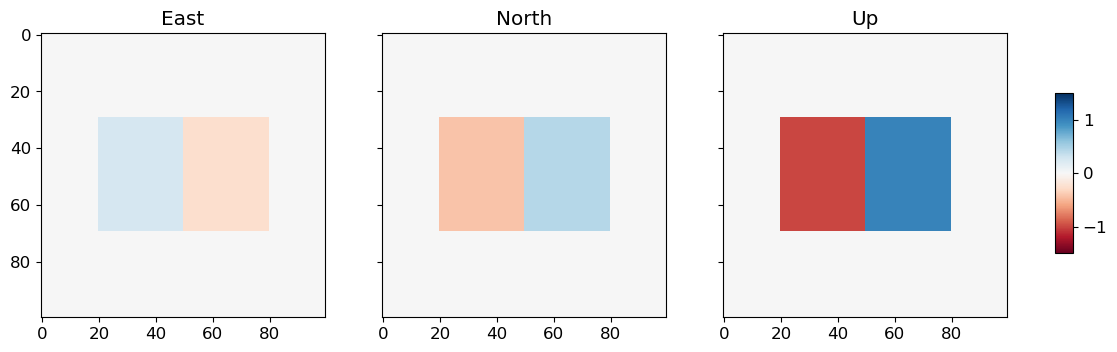

In [10]:
# plot - ENU
kwargs = dict(vmin=-1.5, vmax=1.5, cmap="RdBu", interpolation="nearest")
cbar_len = 0.4
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[12, 4], sharey=True)
for ax, data, title in zip(axs, [dE, dN, dU], ["East", "North", "Up"]):
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)
fig.subplots_adjust(right=0.93)
cax = fig.add_axes([0.97, (1.0 - cbar_len) / 2, 0.015, cbar_len])
fig.colorbar(im, cax=cax)
plt.show()

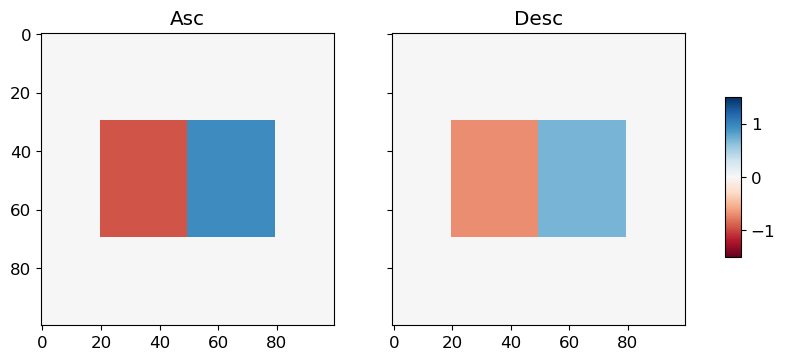

In [11]:
# plot - asc/desc LOS
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4], sharey=True)
for ax, data, title in zip(axs, [dAsc, dDesc], ["Asc", "Desc"]):
    im = ax.imshow(data, **kwargs)
    ax.set_title(title)
fig.subplots_adjust(right=0.93)
cax = fig.add_axes([0.98, (1.0 - cbar_len) / 2, 0.02, cbar_len])
fig.colorbar(im, cax=cax)
plt.show()

In [12]:
print('Simulation: horizontal = {:.2f}, vertical = {:.2f}'.format(simH, simV))
print('Estimation: horizontal = {:.2f}, vertical = {:.2f}'.format(np.max(np.abs(dH)), np.max(np.abs(dV))))

Simulation: horizontal = 0.50, vertical = 1.00
Estimation: horizontal = 0.50, vertical = 1.00


The reason the horizontal displacement result ($dH$) from this analysis contains a **single value** rather than separate east-west ($dE$) and north-south ($dN$) components is due to the **limitations of satellite viewing geometry** and the **simplification of the problem**:

---

### **1. Satellite Viewing Geometry**
- A satellite measures displacement along its **Line-of-Sight (LOS)**, which is a combination of contributions from east-west ($dE$), north-south ($dN$), and vertical ($dV$) motions.
- The ascending and descending LOS measurements provide two independent equations:
  - One from the ascending orbit geometry.
  - One from the descending orbit geometry.
- These two equations allow us to solve for **two unknowns**. Typically, these are:
  - The **vertical displacement** ($dV$).
  - A **projected horizontal displacement** ($dH$), often referred to as the **east-west horizontal component.**

---

### **2. Simplification to a Single Horizontal Value**
- The design matrix ($A$) is constructed to focus on one primary horizontal direction, usually aligned with the **azimuthal difference between the ascending and descending tracks.**
- This alignment leads to the horizontal motion being resolved into a **single horizontal component** ($dH$):
  - This component represents the dominant horizontal displacement, often in the **east-west direction**, as most InSAR analyses prioritize this direction.
- The **north-south motion** ($dN$) is less visible in LOS data because satellites travel near-polar orbits, which are less sensitive to motion in the north-south direction.

---

### **3. Why Only One Horizontal Component is Retrieved**
- **Mathematical Limitations**: With two LOS measurements, it is mathematically impossible to retrieve all three displacement components ($dE$, $dN$, $dV$) without additional information or constraints.
- **Projection Decision**: By convention, the horizontal component is often interpreted as a single direction (e.g., east-west), and the vertical displacement ($dV$) is solved alongside it.

---

### **4. To Retrieve Both $dE$ and $dN$:**
To fully separate $dE$ and $dN$ from $dH$, you need:
- A **third independent measurement**, such as data from a third satellite pass with a different viewing geometry.
- Additional constraints, like assuming that motion is predominantly in a specific direction (e.g., tectonic east-west slip).

---

### **Key Takeaway**
The horizontal displacement ($dH$) in this result is a **combined or projected horizontal motion**, dominated by the azimuthal sensitivity of the satellite tracks. To distinguish east-west ($dE$) and north-south ($dN$) components, more information or measurements are required.

In Interferometric Synthetic Aperture Radar (InSAR) analysis, satellites measure ground displacement along their Line-of-Sight (LOS), which is a combination of vertical and horizontal movements. However, due to the geometry of satellite orbits and the nature of LOS measurements, InSAR is more sensitive to vertical and east-west displacements than to north-south movements.

When combining ascending and descending LOS measurements, it's possible to separate the vertical displacement from one horizontal component, typically the east-west direction. This approach is discussed in the study "Resolving Three-Dimensional Surface Motion with InSAR: Constraints from Multi-Geometry Data and a Mechanical Model," which emphasizes the importance of combining multi-geometry InSAR datasets to accurately retrieve local displacement fields. 

The limitation arises because standard InSAR configurations provide two LOS measurements (ascending and descending), which are insufficient to fully resolve all three displacement components (vertical, east-west, and north-south). To overcome this, additional data from different viewing geometries or complementary techniques are required. This challenge is highlighted in the paper "An Analysis of InSAR Displacement Vector Decomposition Fallacies and a New Method," which discusses the mathematical limitations of decomposing LOS displacements into full 3D vectors with limited observations. 

In summary, the horizontal displacement obtained from standard InSAR analysis often represents a combined or projected motion, predominantly in the east-west direction, due to the constraints of satellite viewing geometries and the sensitivity of LOS measurements. 